In [1]:
from nilearn import plotting, image
import nibabel as nib
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.clear()
sys.path.append("/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice")
import SUITPy.reslice as reslice

### Load files: source image, mask image, affine matrix (output from normalization function), deformation image

In [2]:
img = nib.load('/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/docs/source/notebooks/anatomical_sess-01.nii')
mask = nib.load('/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/docs/source/notebooks/c_anatomical_sess-01_pcereb.nii')
affineTr = sio.loadmat('/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/docs/source/notebooks/Affine_anatomical_sess-01_seg1.mat').get('Affine')
deformation_img = nib.load("/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/docs/source/notebooks/y_suitdef.nii")

In [3]:
deformation_img.shape

(141, 95, 87, 1, 3)

In [4]:
deformation_img.affine

array([[  -1.,    0.,    0.,   70.],
       [   0.,    1.,    0., -100.],
       [   0.,    0.,    1.,  -75.],
       [   0.,    0.,    0.,    1.]])

### Plot source image

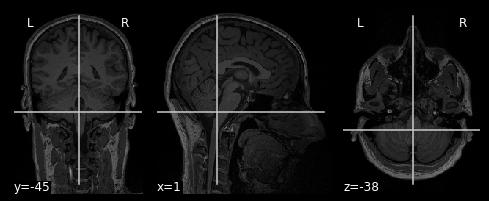

In [5]:
plotting.plot_anat(img)

In [6]:
img.shape

(176, 240, 256)

### make meshgrid which contains needed index for source image and mask image

In [7]:
xm_data, ym_data, zm_data = reslice.mesh_data(affineTr,img,deformation_img)
xm_mask, ym_mask, zm_mask = reslice.mesh_data(affineTr, mask, deformation_img)

In [8]:
data = np.zeros((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))
maskData = np.zeros((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))
data_near = np.zeros((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))
maskData_near = np.zeros((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))

### resample source image and mask image, then maked source image with mask image

In [9]:
data = reslice.sample_image(img, xm_data, ym_data, zm_data, 1).reshape((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))
maskData = reslice.sample_image(mask, xm_mask, ym_mask, zm_mask, 1).reshape((deformation_img.shape[0], deformation_img.shape[1], deformation_img.shape[2]))
masked = np.multiply(data,maskData)

In [10]:
masked_img = reslice.create_img(masked, deformation_img.affine, False)

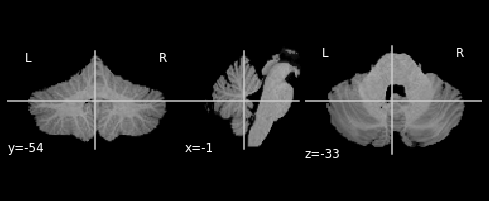

In [11]:
plotting.plot_anat(masked_img, cut_coords=[-1,-54, -33])

### Apply nonlinear deformation to masked image

In [12]:
after_def_img = reslice.non_linear_deformation(deformation_img, masked_img, affineTr)

In [13]:
after_def_img = reslice.create_img(after_def_img, deformation_img.affine, False)

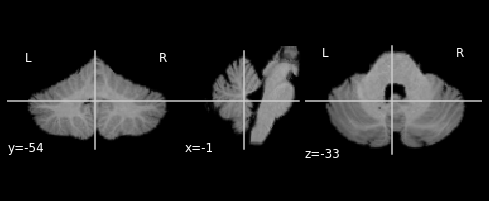

In [14]:
plotting.plot_anat(after_def_img, cut_coords=[-1,-54, -33])